    <h2><center>Supreme Court Oral Arguments Outcome Prediction Team</center></h2>
<h2 style="margin-top: -15px; margi-bottom: 10px;"><center>Final Report</center></h2>

### Project and Team Information
**Team members:** Federico Dominguez Molina, Jessup Jong, Chanteria Milner, and Michael Plunkett

**Project summary:** The project uses historic United States Supreme Court cases to train natural language processing models to predict case rulings. \
**Project repository:** [Link](https://github.com/michplunkett/supreme-court-ml-predictions) \
**Project assumptions and things to know:**
1. The number of unique roles within the advocates' file is too numerous to be helpful, so we merged them into 5 categories. While this merger may remove some variability and nuance in the file, we believe it will make it easier to derive meaningful conclusions.
    - The groupings for the roles are as follows: inferred, for respondent, for partitioner, and for amicus curiae
2. The years included within this data set are 2014 to 2019.
3. The datasets included within the previously mentioned year range are ones where the winnings side was either 0 or 1 (no missing, etc.).

**Models run:** Logistic Regression, XG Boost, and Random Forest

In [10]:
# Imports and setup
%load_ext jupyter_black

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Table of Contents



Introduction
    What the task is. 
    Overview (main things we've tried and learned)

Data:
    Data Analysis (Date Range 2014- 2019)
    Filtering (5 years justices)

Methodology: 
    Feature engineering
    Modeling
    How you are evaluating the models: F-1 metric
    Hyperparameter tuning 
    How you trained it (epochs, test split)

Results:
    Analyze results of model
    Hypothesize which model/hyperparametrs gives better results

Conclusion: 
    Summary:
    Limitation and future work:
    Limitations of the data
        Limitation of the task itself. (only given oral, not given supporting documents)
        Lawyers often don't care about the outcome itself. Rather, they care often in how one arrives at that conclusion. In addition, the articulation and details in the reasoning in the decision is often more important in case. 

### Summary Statistics

[TAKE INFORMATION FROM THE FIRST CHECKPOINT AND MAYBE PRESENT IT AS A TABLE]

### Logistic Regression

**What is a Logistic Regression model?** \
Logistic regression in machine learning is a supervised learning model that predicts the probability of a binary outcome based on training data. It is called a "supervised learning approach" because the model is trained on data where the outcome is known. 

Logistic regression is also a classification model because it predicts the probability of a binary outcome, where it predicts if the petitioner, given the 'bag of words,' won or lost the case. It is also worth noting that regularization can be added to the model to prevent overfitting. Within our current model, we decided against using that feature.

**What are some limitations of the Logistic Regression model?** \
Logistic regression is limited because it assumes a [linear relationship](https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/) between independent and dependent variables. It can also not consider the more complex relationships between the utterances and the Court decisions. It comes up short as the end-all-be-all model for our data since Supreme Court decisions and the speech uttered within them are not independent. Each case cannot be viewed within a vacuum but is instead influenced by precedents and the social trends of its time. Logistic regression may account for the association between verdicts and utterances. Still, it cannot explain or make any statements regarding causality.

**What were we able to conclude from our use of the Logistic Regression model?** \
We applied logistic regression models to four different datasets and observed the below results. We used the following hyperparameters as defaults in our regression: a test size of `0.20`, a random state of 123, and a maximum of 1000 iterations.

--Description of split in data

-- Results in results (bar chart)

**All Utterances:** This dataset comprises a bag of words created from all utterances in the cases between 2014 and 2019, including the judge, advocate, and adversary statements. The model achieved an accuracy of `54.05%`, slightly better than random chance.

**Judge Utterances:** This dataset only focuses on a bag of words from judge statements. The model's accuracy was `52.05%`, underperforming compared to the model using all utterances.

**Advocate Utterances:** Using a bag of words created solely from advocate statements, the model achieved an accuracy of `75.67%`, significantly outperforming the model using all utterances.

**Adversary Utterances:** This dataset consists of a bag of words derived only from adversary statements. The model obtained an accuracy of `78.37%`, outperforming all other models and emerging as the best performer.

In conclusion, models using advocate and adversary utterances independently have higher predictive power than models using judge utterances or a combination of all utterances.

In [ ]:
# Code that runs the Logistic Regression model and creates visuals

### Random Forest

**What is a Random Forest model and what can you conclude from its results?** \
Random Forest is an ensemble of multiple decision trees that combines bagging and random feature selection. Random Forest is trained through [bagging](https://link.springer.com/referenceworkentry/10.1007/978-1-4419-9863-7_612), or different bootstraps of training data and returns the majority vote of multiple decision trees that split on a [random subset](https://link.springer.com/referenceworkentry/10.1007/978-1-4419-9863-7_602) of features.

**What are some limitations of the Random Forest model?** \
It is harder to interpret a Random Forest model than a decision tree because we cannot follow through the decision process like a decision tree. With bagging and random subsets of features, it takes longer and, therefore, more resources to train a random forest model.

The predictions provided by the bag of words CountVectorizer are based solely on word frequency. This does not account for the complex linguistic relationship between phrases and ideas. A more complex vectorizer such as `tf-idf` could help better account for complex expressions and thoughts contained within the utterances.

**What were we able to conclude from our use of the Random Forest model?** \
We picked the Random Forest model because we needed to capture the complex interactions among different words in unstructured data, to avoid overfitting our model by training on multiple decision trees, and to rank the importance of different words on the predicted outcome. We can confirm the model's accuracy by predicting case outcomes from the results, which gives us a view of each unique word's importance. If we were to use this model for cross-validation, or out-of-sample data, we could also see how well the model generalizes and avoids overfitting.

In [ ]:
# Code that runs the Random Forest model and creates visuals

### XG Boost

**What is an XG Boost model and what can you conclude from its results?** 

XG Boost, short for *Extreme Gradient Boosting* is a tree ensemble model that uses gradient boosting to minimize the loss function. In XG Boost, each tree is grown sequentially, taking into account the previous tree's residuals and reweighting the observations accordingly.

XG Boost is called an "ensemble model" because it uses several "weak learners" (decision trees, in this case) to obtain a more robust model by adjusting the tree model on every iteration. It is different than Random Forest because, instead of averaging all of the weak learners' results to make the final prediction, it adjusts the model on every iteration by using the previous model's residuals as the new target variable. This allows the model to learn from its mistakes and improve on every iteration.

**What are some limitations of the XG Boost model?**

As with most ensemble models, XGBoost is very hard to interpret since it considers multiple decision trees to get the final prediction. 

One crucial limitation of the XG Boost model is that it can easily lead to overfitting if the parameters are not properly tuned. This means that XG Boost may practically 'learn' the training data, but may not generalize well to unseen data. The model is also very sensible to outliers and noisy data, which can affect its overall performance.

**What were we able to conclude from our use of the XG Boost model?** 

A crucial insight is that ensemble models tend to perform better than 'single' models. In this case, XG Boost uses several decision trees to make the final prediction while adjusting the model on every iteration. This allows the model to learn from its mistakes and improve on every iteration, which leads to a better overall performance.

On the other hand, however, ease of interpretation is lost, and a lengthy finetuning process is necessary to get the best set of hyperparameters for our context.

<!-- Can print out IDs of which ones are misclassified. Point out /trace back to the data.  -->

In [1]:
# Importing model Class
from supreme_court_predictions.models.xg_boost import (
    XGBoost,
)

In [2]:
# Run model
xgboost_model = XGBoost(debug_mode=True)
xgboost_model.run()

Creating bag of words
Starting the XGBoost model
------------------------------------------
Running a gradient boosted tree model on case_aggregations...
Accuracy score: 0.5675675675675675
F1 score: 0.68
------------------------------------------
Creating bag of words
Starting the XGBoost model
------------------------------------------
Running a gradient boosted tree model on judge_aggregations...
Accuracy score: 0.547945205479452
F1 score: 0.6972477064220183
------------------------------------------
Creating bag of words
Starting the XGBoost model
------------------------------------------
Running a gradient boosted tree model on advocate_aggregations...
Accuracy score: 0.8108108108108109
F1 score: 0.8600000000000001
------------------------------------------
Creating bag of words
Starting the XGBoost model
------------------------------------------
Running a gradient boosted tree model on adversary_aggregations...
Accuracy score: 0.8243243243243243
F1 score: 0.8631578947368421
----

({'case_aggregations': 0.5675675675675675,
  'judge_aggregations': 0.547945205479452,
  'advocate_aggregations': 0.8108108108108109,
  'adversary_aggregations': 0.8243243243243243},
 {'case_aggregations': 0.68,
  'judge_aggregations': 0.6972477064220183,
  'advocate_aggregations': 0.8600000000000001,
  'adversary_aggregations': 0.8631578947368421},
 {'case_aggregations': array([[ 8, 19],
         [13, 34]], dtype=int64),
  'judge_aggregations': array([[ 2, 24],
         [ 9, 38]], dtype=int64),
  'advocate_aggregations': array([[17, 10],
         [ 4, 43]], dtype=int64),
  'adversary_aggregations': array([[20,  7],
         [ 6, 41]], dtype=int64)})

In [6]:
# Baseline Parameters
eta=0.3
subsample=1
max_depth=7
n_estimators=100


# Create an array of different values to test
eta_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
subsample_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [34]:

accuracy_dicts = []
f1_dicts = []
confusion_matrix_dicts = []
value_cols = ['case_aggregations', 'judge_aggregations', 
              'advocate_aggregations', 'adversary_aggregations']

for eta_value in eta_values:
    print(f"Testing eta value: {eta_value}" )
    xgboost_model = XGBoost(debug_mode=False, eta=eta_value)
    xgboost_model.run()

    accuracy_dicts.append(xgboost_model.accuracies)
    f1_dicts.append(xgboost_model.f1)

# Dataframe of accuracy and f1 scores
acc_df = pd.DataFrame.from_dict(accuracy_dicts)
f1_df = pd.DataFrame.from_dict(f1_dicts)

# Add eta value to dataframe
acc_df["eta"] = eta_values
f1_df["eta"] = eta_values

# Convert to long format
acc_melted = acc_df.melt(id_vars='eta', value_vars=value_cols, var_name='type')
f1_melted = f1_df.melt(id_vars='eta', value_vars=value_cols, var_name='type')

Testing eta value: 0.1
Testing eta value: 0.2
Testing eta value: 0.3
Testing eta value: 0.4
Testing eta value: 0.5
Testing eta value: 0.6
Testing eta value: 0.7
Testing eta value: 0.8
Testing eta value: 0.9
Testing eta value: 1


In [35]:
acc_df

,case_aggregations,judge_aggregations,advocate_aggregations,adversary_aggregations,eta
0,0.608108,0.589041,0.824324,0.810811,0.1
1,0.567568,0.575342,0.837838,0.810811,0.2
2,0.567568,0.547945,0.810811,0.824324,0.3
3,0.554054,0.602740,0.824324,0.810811,0.4
4,0.540541,0.547945,0.810811,0.797297,0.5
5,0.540541,0.561644,0.837838,0.797297,0.6
6,0.594595,0.506849,0.824324,0.797297,0.7
7,0.527027,0.575342,0.851351,0.810811,0.8
8,0.567568,0.547945,0.878378,0.824324,0.9
9,0.486486,0.616438,0.810811,0.797297,1.0


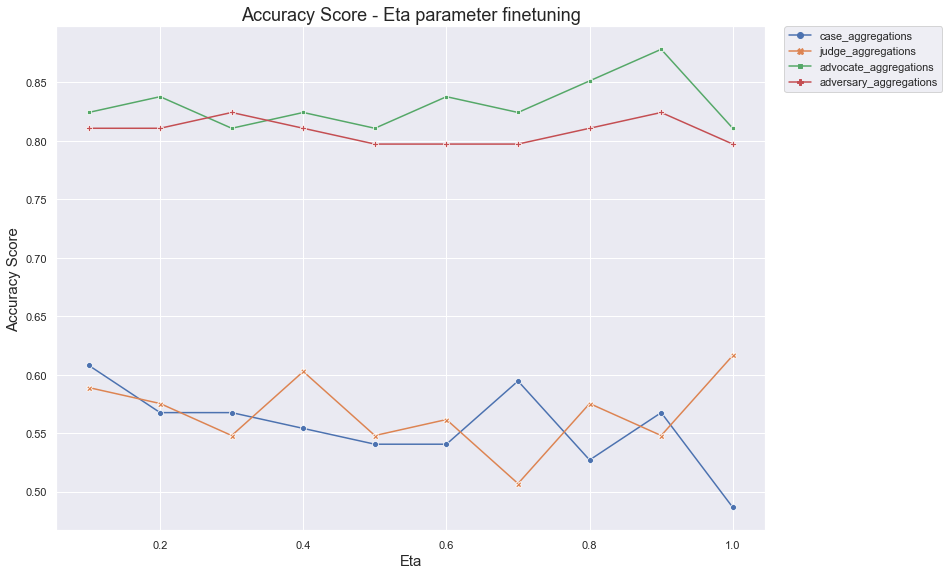

In [38]:

fig_dims = (10, 12)
fig, ax1 = plt.subplots(figsize=fig_dims)
ax1 = sns.lineplot(x ='eta', y='value', data = acc_melted, hue='type', style='type', markers=True, dashes=False)
fig.set_size_inches(12.7, 9.27)
plt.ticklabel_format(style='plain', axis='y')
ax1.set_title(f'Accuracy Score - Eta parameter finetuning', fontsize = 18)
ax1.set_xlabel("Eta", fontsize = 15)
ax1.set_ylabel("Accuracy Score", fontsize = 15)
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)


plt.show()

In [6]:
xgboost_model.accuracies

{'case_aggregations': 0.5675675675675675,
 'judge_aggregations': 0.547945205479452,
 'advocate_aggregations': 0.8108108108108109,
 'adversary_aggregations': 0.8243243243243243}

In [3]:
xgboost_model.f1

{'case_aggregations': 0.68,
 'judge_aggregations': 0.6972477064220183,
 'advocate_aggregations': 0.8600000000000001,
 'adversary_aggregations': 0.8631578947368421}

In [4]:
xgboost_model.confusion_matrix

{'case_aggregations': array([[ 8, 19],
        [13, 34]], dtype=int64),
 'judge_aggregations': array([[ 2, 24],
        [ 9, 38]], dtype=int64),
 'advocate_aggregations': array([[17, 10],
        [ 4, 43]], dtype=int64),
 'adversary_aggregations': array([[20,  7],
        [ 6, 41]], dtype=int64)}

### Summation

**What model worked best for predicting case results based on utterances?**
[2-3 sentences]

**How performant were each of the models (time, processing power, etc.)?**
[2-3 sentences]

**If our constraints are time and computing power, which of the three models would be the best to implement?**
[2-3 sentences]

**What was a notable technical lesson you learned while creating this project?**

**Federico:** 

**Jessup:**
Compared to manually programming each machine learning model, I learned that using sklearn is drastically easier. This frees up a lot of time to work on optimizing the model through hyperparameters and picking amongst many available models to best fit the different kind of data we are training on. 

**Chanteria:**

**Michael:**